# Test de Hipótesis

Vamos a comenzar simulando el test que te contamos en el Toolbox. Recordemos de qué se trata:

A raíz de una discusión entre mentores, en la cual un grupo afirmaba que los y las estudiantes de ciencia de datos tienen un IQ -una medida que pretende medir la inteligencia lógica- más alto que la media poblacional, el equipo pedagógico de Acamica decidió hacer un experimento con una muestra randomizada para testear esta hipótesis. Estos fueron los resultados:

**Muestra de estudiantes de ciencia de datos**
* IQ promedio: 105
* Cantidad de muestras: 16

**Datos de la población total (estos datos vienen dados)**
* IQ promedio: 100
* Desviación estándar: 15

Además, se sabe que la distribución de IQ es Normal o Gaussian.

El enfoque que seguiremos a continuación es parecido al de la bitácora, pero al principio puede parecer distinto. Pero vamos a ir despacio, y esperemos que al final los conceptos más difíciles hayan quedado claros. 

Lo primero que debemos establecer son cuáles son nuestras hipótesis:

* **H0:** Las personas que estudian ciencia de datos en Acamica NO cuentan con un IQ medio más alto que la media poblacional.
* **H1:** Las personas que estudian ciencia de datos en Acamica tienen un IQ más alto que la media poblacional.

Notar que - en este caso - los datos de la población vienen dados y son conocidos: distribución normal, media 100 y desviación estándar de 15. ¿Cómo usarías esos datos para comparar con la muestra obtenida en ciencia de datos?

Acá es donde entra el poder de la computadora: podemos **simular**. Podemos generar muestras de 16 elementos de una distribución normal con media 100 y desviación estándar de 15 y ver cuál es su promedio. Pero no lo hacemos una vez, sino varias, para ver la variabilidad esperada. Comencemos por eso (si te suena parecido a lo que hicimos en el encuentro anterior, es porque es exactamente lo mismo). 

**Muy importante:** notar que al hacer esto estamos trabajando **asumiendo que la hipótesis nula es cierta**. 


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
mu_observado = 105
n = 16 # numero de muestras
mu_poblacion = 100 # Media de la poblacion
sd_poblacion = 15 # DS de la poblacion
N = 1000000 # cantidad de veces que tomaremos una muestra


In [22]:
medias = np.zeros(N)
for i in range(N):
    muestras = np.random.normal(loc = mu_poblacion, scale = sd_poblacion, size = n)
    medias[i] = muestras.mean()

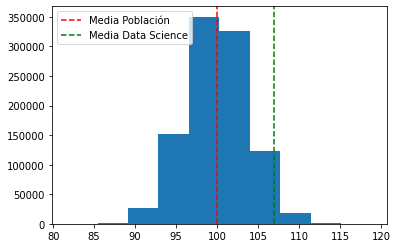

In [23]:
plt.hist(medias)
plt.axvline(mu_poblacion, c = 'r', ls = '--', label = 'Media Población')
plt.axvline(mu_observado, c = 'g', ls = '--', label = 'Media Data Science')
plt.legend()
plt.show()

Paremos un poquito para mirar este gráfico, que en realidad contiene toda la información que necesitamos para hacer el test. Primero, repasemos exactamente qué es lo que contiene el histograma: contiene los valores medios obtenidos al muestrear `N` (por default, 100000) veces una población normal de media 100 y desviación estándar 15, utilizando un tamaño de muestra de 16. 

Te recomendamos que leas esta frase tantas veces como sea necesario para estar seguro que estás de acuerdo con ella.

Ahora, mirando el gráfico, ¿te parece que el valor medio observado está dentro de lo esperado? Si bien está "a la derecha" del histograma, parece estar dentro de lo esperado. 

Ahora, tratemos de cuantificar cuán "esperado" es este valor. Una de las formas de hacerlo es la siguiente forma: contemos cuántos eventos iguales o más extremos que el valor observado hay. Si son "muchos", es porque nuestro valor observado no era tan extremo. Eso es, precisamente, el p-valor.

In [34]:
eventos_mas_extremos = medias[medias >= mu_observado]
print(f'Hay {eventos_mas_extremos.size} valores medios iguales o mayores al observado')

Hay 8286 valores medios iguales o mayores al observado


¿Es mucho o poco? En primer lugar, deberíamos tener en cuenta la cantidad de experimentos realizados. Eso es el p-valor.

In [35]:
p_valor = eventos_mas_extremos.size/N
print(f'El p-valor es {p_valor}')

El p-valor es 0.008286


Bien, pero eso sigue sin responder si es mucho o poco. Eso, en general, lo decide el científico, y es el valor de significancia $\alpha$. Es común utilizar $\alpha = 0.05$, por lo que en este caso NO podemos rechazar la hipótesis nula, es decir, los y las estudiantes de ciencias de datos no parecen tener un IQ por encima de la media poblacional.

Notar que el tamaño de la muestra es lo único que aparece con respecto a la muestra original, los 16 estudiantes de ciencia de datos. Aparte de ese número, lo único que importa para este caso es el valor medio obtenido. Notar que no estamos utilizando las muestras. Esto **NO** es así para todos los test, sino solamente para éste que desarrollamos, donde el estadístico que utilizamos es el valor medio. ¿Es el único estadístico válido? Para nada. Podríamos haber utilizado también otros, como la desviación estándar, el máximo de la muestra o el mínimo, etc. Cada uno de ellos conlleva unas hipótesis distintas, y al usar el valor medio estamos asumiendo un conjunto de hipótesis particular.

**Para pensar:** ¿te parece suficiente este test para rechazar o no la hipótesis nula?¿Qué cosas podrían estar "engañando" al test? (**Pista**: ¿qué ocurre si la muestra tuviera outliers?).

**Ejercicio:** en este proceso, a partir del valor observado calculamos el p-valor y luego miramos si éste es menor o mayor al nivel de significancia $\alpha$. Pero se podría hacer de otra forma: dado un nivel de significancia, estimar el valor umbral del IQ asociado a partir del cuál rechazamos o no la hipótesis nula. Implementa las líneas de código que calculen ese umbral. ¿Qué información se pierde?

In [32]:
# COMPLETAR
# Buscamos IQ en la media que cae en el percentil que queremos
np.percentile(medias,99)

108.72447735947867

Pero, ¿y el Z-score?¿Y todo lo que vimos en el toolbox?

Esa es la forma analítica de llegar a los resultados que llegamos simulando. Lo bueno, es que es más preciso. Lo malo, es que en general hay muchas menos formas analíticas que computacionales. Por completitud, dejamos también la forma analítica. Trata de encontrar los puntos en común con la forma simulada, y notarás que es prácticamente el mismo procedimiento.

En primer lugar, debemos calcular el valor $z = \frac{\overline{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$ para nuestra muestra.

In [38]:
z = (mu_observado - mu_poblacion)/(sd_poblacion/np.sqrt(n))
print(z)

1.3333333333333333


Esto quiere decir, simplemente, que el valor observado está a 1.333 desviaciones estándar del valor medio de la población (¡Ojo!¿Medido en cuál desviación estándar: de la población o del valor medio para ese tamaño de muestra?).

Ahora, es el procedimiento es el mismo que antes. Tenemos que ver si este valor es suficiente o no para rechazar la hipótesis nula. Entonces, debemos calcular el p-valor. Para ello, vamos a la tabla. La tabla nos da las probabilidades acumuladas (a la izquierda) hasta ese `z`. Para `z = 1.33`, ésta es 0.9082. Entonces, lo que queda "a derecha" es 1 - 0.9082 = 0.0918. ¡Éste es el p-valor! Y como es mayor que 0.05, no podemos rechazar la hipótesis nula. ¡Además, es prácticamente igual al que conseguimos simulando!

Nuevamente, si queremos saber si rechazamos o no la hipótesis nula, pero sin saber el valor de p, es calcular el umbral de z a partir del cuál la rechazaríamos, que es lo que hacemos en el toolbox. En este caso, ese umbral daría aproxidamente 1.645.

Todo esto puede - y suele - ser muy confuso. En particular, el mundo de test de hipótesis suele serlo. Pero la aproximación computacional suele ser más transparente e inmediata, por lo que es la que recomendamos cuando se pueda aplicar (lo cual no implica que si hay un test ya establecido para nuestro caso, no esté bueno usarlo).

# Ejercitación

Resuelve el problema planteado. Según los datos que cuentas, decide que test usar, implementalo y saca las conclusiones pertinentes.


### Problema: 

  General Roca es una ciudad de la Patagonia argentina. Se han encontrado rastros de [metales pesados en sus ríos](https://www.lmcipolletti.com/alarmantes-niveles-materia-fecal-y-metales-pesados-el-rio-negro-n541498) y tú formas parte del comité científico interdiciplinario que va a determinar si hay contaminación. Para realizar el análisis, se recolectaron muestras de diferentes ríos de la ciudad y muestras de Bariloche, otra ciudad de Argentina que tiene condiciones similares a General Roca y se presume no tiene los ríos contaminados. Tu tarea como científico de datos es determinar si en Roca hay una mayor concentración de metales pesados que en Bariloche.

Las muestras están medidas en mg por litro.

### Datos de las muestras:

muestras_roca = [0.4, 0.6, 0.7, 0.8, 0.3, 0.7, 0.5, 0.6, 0.4]

muestras_bariloche = [0.3, 0.5, 0.5, 0.1, 0.8, 0.3, 0.4, 0.2, 0.5] 



**Ayuda**: si hablas inglés [este](https://www.youtube.com/watch?v=pTmLQvMM-1M&ab_channel=BozemanScience) video te puede resultar de utilidad. En caso de que busques algo en español, puedes visitar [este](https://www.youtube.com/watch?v=4kZQ9eqLa_A&ab_channel=Tarefa) otro (ten en cuenta que estamos trabajando con dos muestras independientes y no tenemos datos de la población total).


1. Formulá la hipótesis alternativa y la hipótesis nula.

(array([1., 0., 2., 0., 1., 2., 0., 0., 2., 1.]),
 array([0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ]),
 <BarContainer object of 10 artists>)

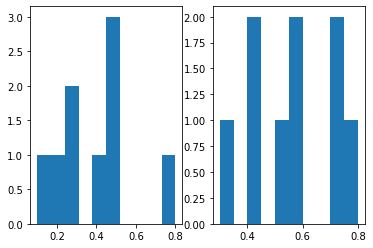

In [39]:
#H0: no hay metales pesados en Gral. Roca
#H1: may metales pesados en Gral. Roca
import numpy as np
import pylab as plt

B=[0.3, 0.5, 0.5, 0.1, 0.8, 0.3, 0.4, 0.2, 0.5] #bariloche
GR=[0.4, 0.6, 0.7, 0.8, 0.3, 0.7, 0.5, 0.6, 0.4] #gral roca

plt.subplot(121)
plt.hist(B)
plt.subplot(122)
plt.hist(GR)

In [40]:
sB=np.std(B)
mB=np.mean(B)

sGR=np.std(GR)
mGR=np.mean(GR)

#podemos reformular hipotesis matematicamente
#H0: mGR=mB
#H1: mGR>mB

In [41]:
sB

0.19436506316151003

In [42]:
mB

0.4

In [43]:
mGR

0.5555555555555556

  2. Establecé un nivel de significancia y realizá el test que mejor se adecúe al problema. 
  
*Agrega todas las celdas que sean necesarias.

In [44]:
alpha=0.05

In [46]:
#uso test z-score
z = (mGR - mB)/(sB/np.sqrt(len(GR)))
z

2.4009801919951235

3. Saca tus propias conclusione

Mirando la [tabla](http://www.z-table.com/how-to-use-z-score-table.html) del Z-score que aparece en el toolbox, se ve que el área bajo la curva es de 0.99. Eso da un p-valor de 0.01, es decir, hay un 1% de probabilidad de que H1 sea falsa. Como el nivel de significancia era de 0.05, podemos considerar que H1 es verdadera.

# **Bonus:**

Una vez que hayas terminado el test, piensa cómo lo simularías con un abordaje similar al que realizamos al principio de la ejercitación. Si te animas, escribe el código.

In [47]:
#implementamos metodo mostrado mas arriba
mu_observado = mGR
n = len(GR) # numero de muestras
mu_poblacion = mB # Media de la poblacion
sd_poblacion = sB # DS de la poblacion
N = 1000000 # cantidad de veces que tomaremos una muestra

In [52]:
n

9

In [48]:
medias = np.zeros(N)
for i in range(N):
    muestras = np.random.normal(loc = mu_poblacion, scale = sd_poblacion, size = n)
    medias[i] = muestras.mean()

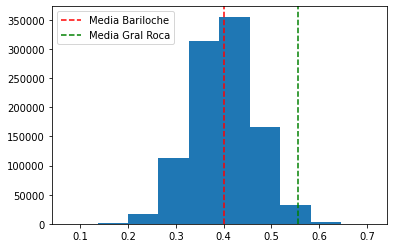

In [49]:
plt.hist(medias)
plt.axvline(mu_poblacion, c = 'r', ls = '--', label = 'Media Bariloche')
plt.axvline(mu_observado, c = 'g', ls = '--', label = 'Media Gral Roca')
plt.legend()
plt.show()

In [50]:
eventos_mas_extremos = medias[medias >= mu_observado]
print(f'Hay {eventos_mas_extremos.size} valores medios iguales o mayores al observado')

Hay 8086 valores medios iguales o mayores al observado


In [51]:
p_valor = eventos_mas_extremos.size/N
print(f'El p-valor es {p_valor}')

El p-valor es 0.008086


El p valor es menor a alpha, podemos dar por cierto H1, las meustras de Gral Roca contienen metales pesados